# DEEP LEARNING PROJECT

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

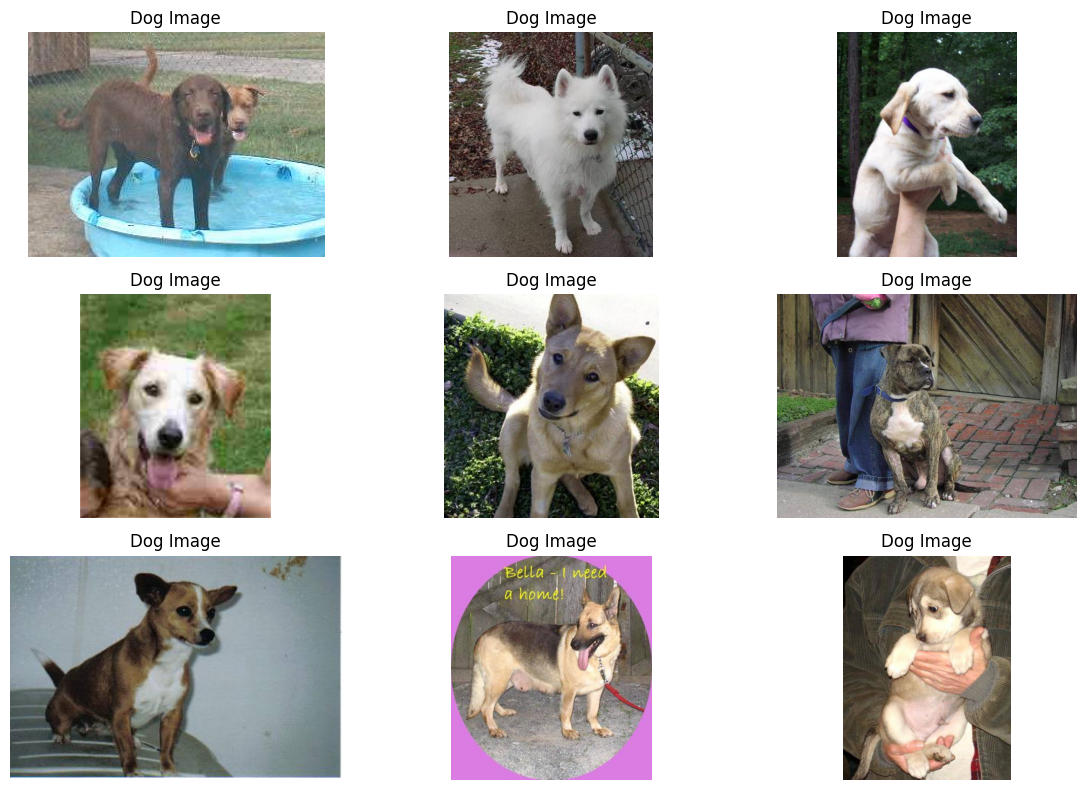

In [4]:
img_source = "/workspaces/2Deep-Learning_LeryBenavides/data/raw"

dog_folder = os.path.join (img_source, "dog")
dog_image_files = os.listdir (dog_folder)

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_folder, dog_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure (figsize = (12,8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

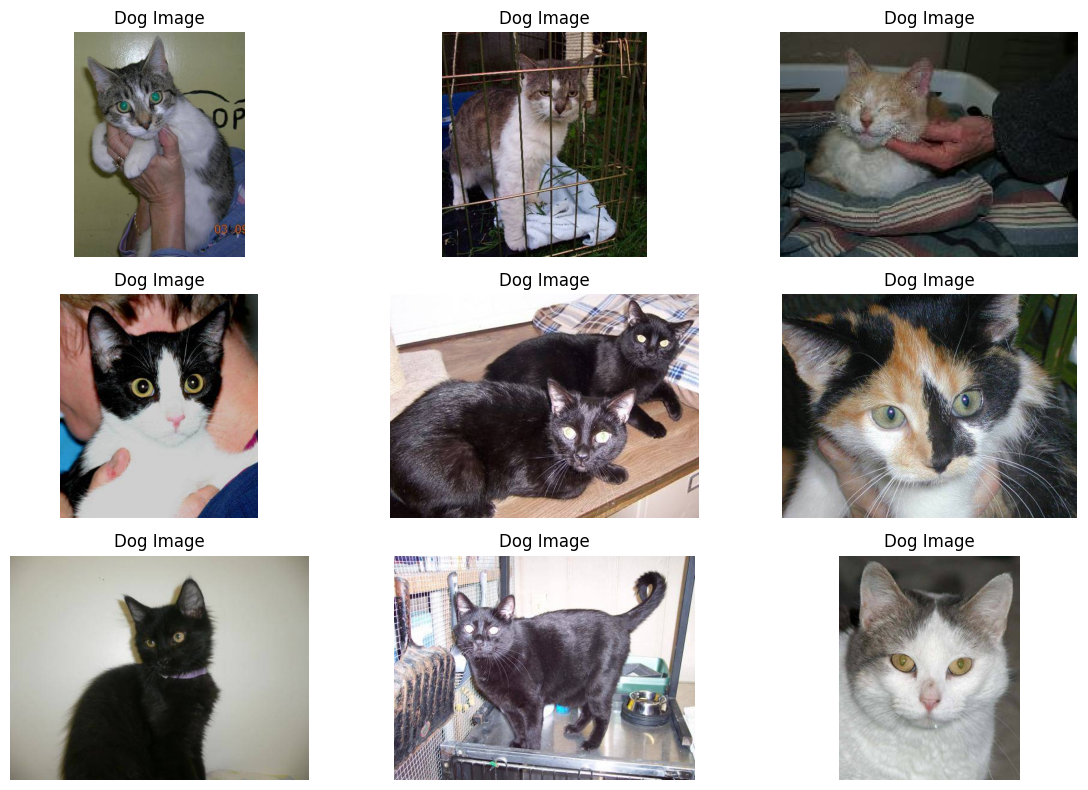

In [5]:
img_source = "/workspaces/2Deep-Learning_LeryBenavides/data/raw"

cat_folder = os.path.join (img_source, "cat")
cat_image_files = os.listdir (cat_folder)

cat_images = []
for i in range(9):
    img_path = os.path.join(cat_folder, cat_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cat_images.append(img_array)

plt.figure (figsize = (12,8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = "/workspaces/2Deep-Learning_LeryBenavides/data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator(rescale=1./255)
datagentest = ImageDataGenerator(rescale=1./255)

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"], 
    batch_size = 32
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(input_shape=(image_size[0], image_size[1], 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 1
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Capa 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 4
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 5
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Capa 6
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 7
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 8
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 9
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Capa 10
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 11
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 12
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 13
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Capa 14
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 15
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 16
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))  # Capa 17
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Capa 18

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))  # Capa densa 1
model.add(Dense(units=4096, activation="relu"))  # Capa densa 2
model.add(Dense(units=2, activation="softmax"))  # Capa de salida

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-13 16:46:48.683980: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-05-13 16:46:49.154336: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-05-13 16:46:49.302862: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-05-13 16:46:49.483880: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-05-13 16:46:49.573442: W external/local_tsl/tsl/fr

In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [18]:
model.fit(train_data, epochs=1)

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 68/782 ━━━━━━━━━━━━━━━━━━━━ 6:31:18 33s/step - accuracy: 0.5121 - loss: 1.1760

: 